# **05 - MODELING**

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import urllib.request
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

Here we are reading the data in.

In [2]:
data = pd.read_csv('/data/chiragnarayanakere/NewNBA.csv')

In [3]:
data = data.drop('Unnamed: 0', 1)
data.head()

,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,mademissnum
0,1,10.8,2,1.9,7.7,2,made,1.3,1
1,2,10.3,2,1.9,17.2,2,missed,3.4,0
2,2,10.9,2,2.7,3.7,2,missed,1.1,0
3,2,9.1,2,4.4,18.4,2,missed,2.6,0
4,4,14.5,11,9.0,20.7,2,missed,6.1,0


## **SELECT THE TARGET COLUMN FOR PREDICTION**

In [4]:
target = data['mademissnum']

## **CREATE DATASET WITHOUT THE TARGET**

In [5]:
newdata = data[['PERIOD','SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST']]

In [6]:
assert len(data['mademissnum']) == len(target)
assert newdata.shape == (101187, 7)

## **FITTING THE MODEL**
* Finding the optimized parameters

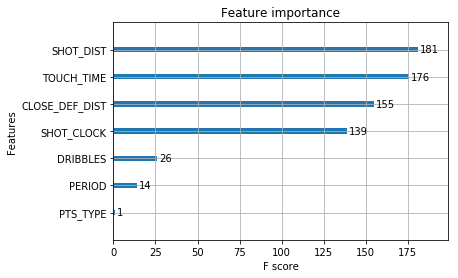

In [7]:
model = xgb.XGBClassifier()
model.fit(newdata,target)
xgb.plot_importance(model, importance_type = 'weight')
plt.show()

Here we are creating a new dataset using the top four results from the feature importance graph.

In [8]:
optdata = newdata[['SHOT_DIST', 'TOUCH_TIME', 'CLOSE_DEF_DIST', 'SHOT_CLOCK']]

## CREATING AN OPTIMIZED MODEL - XGBoost

Here we are splitting the data into appropriate training and testing data.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(optdata, target, train_size=0.70, test_size = 0.3, random_state=42)

Here we are fitting the model to the training data, and using it to predict the test data.

In [10]:
xgbmodel = xgb.XGBClassifier().fit(X_train,y_train)

predicted = xgbmodel.predict(X_test)

actual = y_test

Here we see the model accuracy.

In [11]:
print(precision_score(actual, predicted))

0.6450558123802007


As we can see, the $R^2$ value is about .645 which means that the optimized model doesn't do a very good job of predicting the data.

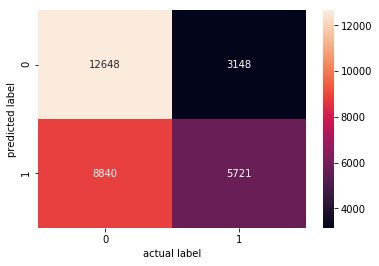

In [12]:
confusion = confusion_matrix(actual, predicted)
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('actual label')
plt.ylabel('predicted label')
plt.show()

## CREATING A NORMAL MODEL - XGBoost

Here we are splitting the data into appropriate training and testing data.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(newdata, target, train_size=0.70, test_size = 0.3, random_state=42)

Here we are fitting the model to the training data, and using it to predict the test data.

In [14]:
xgbmodel = xgb.XGBClassifier().fit(X_train,y_train)

predicted = xgbmodel.predict(X_test)

actual = y_test

Here we see the model accuracy.

In [15]:
print(precision_score(actual, predicted))

0.6472606656753974


As we can see, the $R^2$ value is about .647 which means that the normal model doesn't do a very good job of predicting the data.

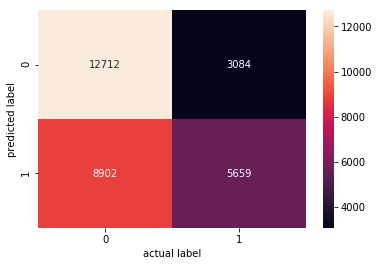

In [16]:
confusion = confusion_matrix(actual, predicted)
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('actual label')
plt.ylabel('predicted label')
plt.show()

## CREATING AN OPTIMIZED MODEL - KNeighbors

Here we are splitting the data into appropriate training and testing data.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(optdata, target, train_size=0.70, test_size = 0.3, random_state=42)

Here we are fitting the model to the training data, and using it to predict the test data.

In [18]:
knmodel = KNeighborsClassifier().fit(X_train, y_train)

predicted = knmodel.predict(X_test)

actual = y_test

Here we see the model accuracy.

In [19]:
print(precision_score(actual, predicted))

0.5438492357916604


As we can see, the $R^2$ value is about .544 which means that the optimized model doesn't do a very good job of predicting the data.

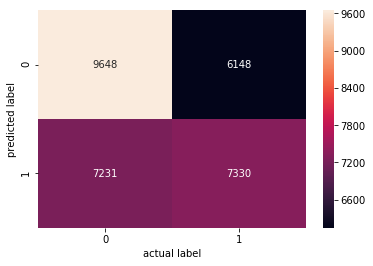

In [20]:
confusion = confusion_matrix(actual, predicted)
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('actual label')
plt.ylabel('predicted label')
plt.show()

## CREATING A NORMAL MODEL - KNeighbors

Here we are splitting the data into appropriate training and testing data.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(newdata, target, train_size=0.70, test_size = 0.3, random_state=42)

Here we are fitting the model to the training data, and using it to predict the test data.

In [22]:
knmodel = KNeighborsClassifier().fit(X_train, y_train)

predicted = knmodel.predict(X_test)

actual = y_test

Here we see the model accuracy.

In [23]:
print(precision_score(actual, predicted))

0.5470773282610286


As we can see, the $R^2$ value is about .547 which means that the normal model doesn't do a very good job for predicting the data.

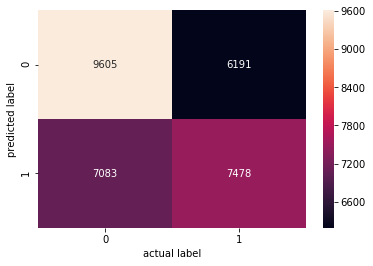

In [24]:
confusion = confusion_matrix(actual, predicted)
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('actual label')
plt.ylabel('predicted label')
plt.show()

## CREATING AN OPTIMIZED MODEL - Random Forest

Here we are splitting the data into appropriate training and testing data.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(optdata, target, train_size=0.70, test_size = 0.3, random_state=42)

Here we are fitting the model to the training data, and using it to predict the test data.

In [26]:
rfmodel = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

predicted = rfmodel.predict(X_test)

actual = y_test

Here we see the model accuracy.

In [27]:
print(precision_score(actual, predicted))

0.562443401662962


As we can see, the $R^2$ value is about .562 which means that the optimized model doesn't do a very good job of predicting the data.

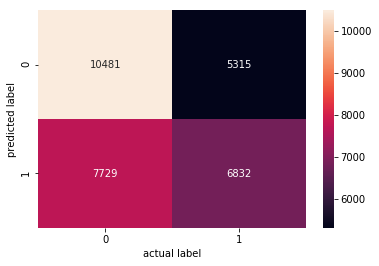

In [28]:
confusion = confusion_matrix(actual, predicted)
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('actual label')
plt.ylabel('predicted label')
plt.show()

## CREATING A NORMAL MODEL - Random Forest

Here we are splitting the data into appropriate training and testing data.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(newdata, target, train_size=0.70, test_size = 0.3, random_state=42)

Here we are fitting the model to the training data, and using it to predict the test data.

In [30]:
rfmodel = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

predicted = rfmodel.predict(X_test)

actual = y_test

Here we see the model accuracy.

In [31]:
print(precision_score(actual, predicted))

0.5730564699924031


As we can see, the $R^2$ value is about .573 which means that the normal model doesn't do a very good job of predicting the data.

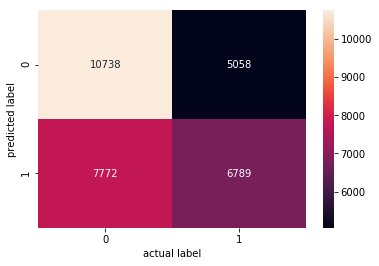

In [32]:
confusion = confusion_matrix(actual, predicted)
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('actual label')
plt.ylabel('predicted label')
plt.show()

As we can see, the XGB Classifier model does the best job of predicting the data, compared to the GaussianNB and Random Forest Classifier models. However, even though it does a better job, all three models struggle to predict the data accurately. Since we have moderately low $R^2$ values we can assume two things: [1] That there may be one or more metrics that affect the result of the shot, that have not been incorporated into the models, and [2] There is little to no relation between the metrics I have chosen and the result of the shot. 


To improve this model for the future, I would run the plot importance check on all metrics of the original dataset and pick those metrics with the highest feature scores. By doing this I will be able to select the best parameters for the model based on factual evidence, instead of just picking and choosing what I believe to be the best predictors of shot result. 